<a href="https://colab.research.google.com/github/FrZeller/Portfolio/blob/main/DataViz_Gr%C3%A1ficos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Definindo a paleta de cores
AZUL1, AZUL2, AZUL3, AZUL4, AZUL5 = '#03045e', '#0077b6', "#00b4d8", '#90e0ef', '#CDDBF3'
CINZA1, CINZA2, CINZA3, CINZA4, CINZA5 = '#212529', '#495057', '#adb5bd', '#dee2e6', '#f8f9fa'
VERMELHO1, LARANJA1, AMARELO1, VERDE1, VERDE2 = '#e76f51', '#f4a261',	'#e9c46a', '#4c956c', '#2a9d8f'

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patheffects as path_effects
# Importando o relátorio de vendas da Loja

vendas = pd.read_csv("https://raw.githubusercontent.com/alura-cursos/dataviz-graficos/master/dados/relatorio_vendas.csv")
vendas['data_pedido'] = pd.to_datetime(vendas['data_pedido'], format='%Y-%m-%d')
vendas['data_envio'] = pd.to_datetime(vendas['data_envio'], format='%Y-%m-%d')
vendas

,data_pedido,data_envio,modo_envio,nome_cliente,segmento_cliente,cidade,estado,regiao,departamento,tipo_produto,preco_base,preco_unit_sem_desc,desconto,preco_unit_venda,quantidade,vendas,lucro
0,2018-11-09,2018-11-12,Econômica,Thiago Silveira,B2C,Ribeirão Preto,São Paulo,Sudeste,Materiais de construção,encanamentos,409.70,445.33,0.000,445.33,2,890.66,71.26
1,2018-11-09,2018-11-12,Econômica,Thiago Silveira,B2C,Ribeirão Preto,São Paulo,Sudeste,Materiais de construção,ferramentas,705.10,829.53,0.000,829.53,3,2488.59,373.29
2,2018-06-13,2018-06-17,Econômica,Giovanna Lima,B2B,Rio de Janeiro,Rio de Janeiro,Sudeste,Jardinagem e paisagismo,sementes,19.02,24.86,0.000,24.86,2,49.72,11.68
3,2017-10-12,2017-10-19,Entrega padrão,Ana Júlia da Cruz,B2C,Foz do Iguaçu,Paraná,Sul,Materiais de construção,materiais de revestimento,781.38,840.19,0.225,651.15,5,3255.75,-651.15
4,2017-10-12,2017-10-19,Entrega padrão,Ana Júlia da Cruz,B2C,Foz do Iguaçu,Paraná,Sul,Jardinagem e paisagismo,vasos,35.88,42.24,0.100,38.02,2,76.04,4.28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8935,2018-09-30,2018-10-04,Entrega padrão,Enrique Santos,B2C,Rio de Janeiro,Rio de Janeiro,Sudeste,Automotivo,ferramentas automotivas,97.34,123.22,0.000,123.22,1,123.22,25.88
8936,2019-11-18,2019-11-22,Entrega padrão,Heitor Silveira,B2B,Jequié,Bahia,Nordeste,Automotivo,ferramentas automotivas,223.01,271.97,0.000,271.97,1,271.97,48.96
8937,2019-11-18,2019-11-22,Entrega padrão,Heitor Silveira,B2B,Jequié,Bahia,Nordeste,Automotivo,pneus,121.23,140.15,0.000,140.15,5,700.75,94.60
8938,2016-01-22,2016-01-24,Econômica,Isabel Araújo,B2C,João Pessoa,Paraíba,Nordeste,Materiais de construção,iluminação,26.29,31.79,0.100,28.61,3,85.83,6.96


In [3]:
vendas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8940 entries, 0 to 8939
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   data_pedido          8940 non-null   datetime64[ns]
 1   data_envio           8940 non-null   datetime64[ns]
 2   modo_envio           8940 non-null   object        
 3   nome_cliente         8940 non-null   object        
 4   segmento_cliente     8940 non-null   object        
 5   cidade               8940 non-null   object        
 6   estado               8940 non-null   object        
 7   regiao               8940 non-null   object        
 8   departamento         8940 non-null   object        
 9   tipo_produto         8940 non-null   object        
 10  preco_base           8940 non-null   float64       
 11  preco_unit_sem_desc  8940 non-null   float64       
 12  desconto             8940 non-null   float64       
 13  preco_unit_venda     8940 non-nul

# Questionamentos
## Depois de visualizar os dados que temos de maneira rápida, vamos partir para análises baseadas em questionamentos respondidos através desses dados.

1. Qual o total de vendas por ano? E qual ano performou melhor em nossa base de dados?
2. Qual é o top 7 produtos que mais apresentaram lucros em nosso catálogo durante o período representado?
3. Se separarmos o total de vendas por ano por regiões? O que conseguimos observar em nossos dados?
4. Qual o modo de envio mais utilizado pelos clientes da loja? É proporcional para B2B e B2C?
5. Qual o total de vendas por trimestre do estado de São Paulo?
6. Qual o faturamento por trimestre em cada região?

In [4]:
df_vendas_ano = vendas.copy()
df_vendas_ano = df_vendas_ano[['data_pedido','vendas']]

df_vendas_ano

,data_pedido,vendas
0,2018-11-09,890.66
1,2018-11-09,2488.59
2,2018-06-13,49.72
3,2017-10-12,3255.75
4,2017-10-12,76.04
...,...,...
8935,2018-09-30,123.22
8936,2019-11-18,271.97
8937,2019-11-18,700.75
8938,2016-01-22,85.83


In [5]:
df_vendas_ano['ano'] = df_vendas_ano.data_pedido.dt.year
df_vendas_ano.drop(labels = 'data_pedido', axis=1, inplace=True)
df_vendas_ano

,vendas,ano
0,890.66,2018
1,2488.59,2018
2,49.72,2018
3,3255.75,2017
4,76.04,2017
...,...,...
8935,123.22,2018
8936,271.97,2019
8937,700.75,2019
8938,85.83,2016


In [6]:
df_vendas_ano = df_vendas_ano.groupby('ano').sum()
df_vendas_ano

,vendas
ano,
2016,1402652.33
2017,1489179.52
2018,1884161.41
2019,2305006.29


<ipython-input-7-5a4a9df9e5ec>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data = df_vendas_ano, x = df_vendas_ano.index, y="vendas", palette = cores)
<ipython-input-7-5a4a9df9e5ec>:13: UserWarning: 
The palette list has fewer values (1) than needed (4) and will cycle, which may produce an uninterpretable plot.
  ax = sns.barplot(data = df_vendas_ano, x = df_vendas_ano.index, y="vendas", palette = cores)


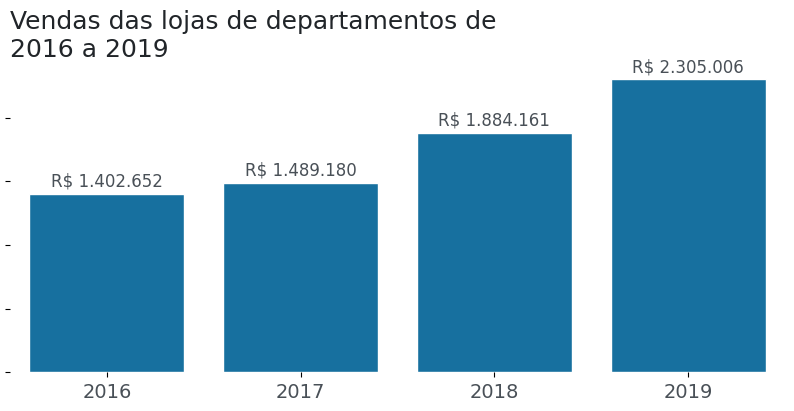

In [7]:

## Gerando a função para criar o gráfico de colunas

def grafico_vendas(cores: list=[AZUL2]):
  # Importando as bibliotecas
  import matplotlib.pyplot as plt
  import seaborn as sns

  # Área do gráfico e tema da visualização
  fig, ax = plt.subplots(figsize=(10,4))
  sns.set_theme(style="white")

  # Gerando o gráfico de colunas
  ax = sns.barplot(data = df_vendas_ano, x = df_vendas_ano.index, y="vendas", palette = cores)

  # Personalizando o gráfico
  ax.set_title("Vendas das lojas de departamentos de\n2016 a 2019", loc="left", fontsize = 18, color = CINZA1)
  ax.set_xlabel("")
  ax.set_ylabel("")
  ax.xaxis.set_tick_params(labelsize = 14, labelcolor= CINZA2)
  sns.despine(left = True, bottom = True)

  # Escrevendo os valores de cada barra no gráfico
  ax.set_yticklabels([])
  for i, valor in enumerate(df_vendas_ano["vendas"]):
    qtd = f'R$ {valor:,.0f}'.replace(",",".")
    offset = 1e5
    ax.text(i, valor + offset, qtd, color = CINZA2, fontsize = 12, ha = "center", va = "center")

  # retornando o eixo
  return ax

# chamando a função
ax = grafico_vendas()

Respondendo a Primeira pergunta chegamos a resposta que:
no ano de 2016 o total de vendas é 1402652.33 |
no ano de 2017 o total de vendas é 1489179.52 |
no ano de 2018 o total de vendas é 1884161.41 |
no ano de 2019 o total de vendas é 2305006.29

<ipython-input-7-5a4a9df9e5ec>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data = df_vendas_ano, x = df_vendas_ano.index, y="vendas", palette = cores)


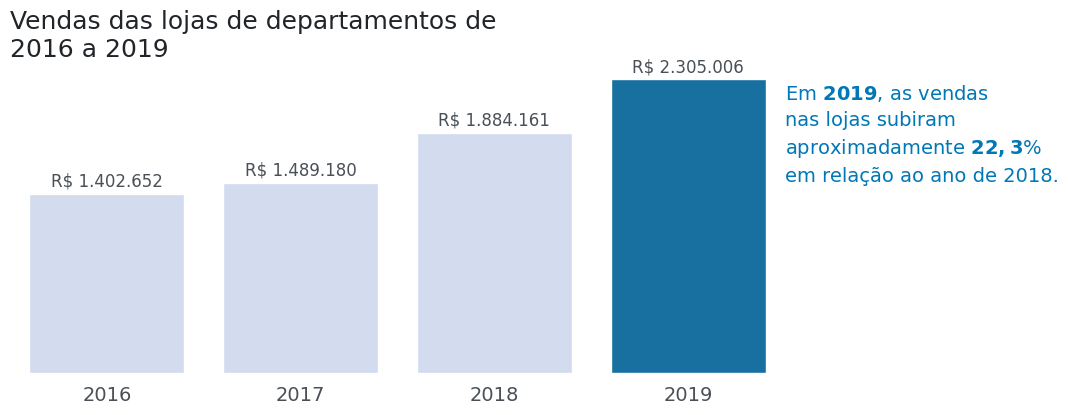

In [8]:
## Configurando o grafico com o paramentro que potencializam a visualizacao dos dados

# Definindo as cores do grafico
cores = []
for ano in df_vendas_ano.index:
  if df_vendas_ano.loc[ano,'vendas'] == df_vendas_ano.vendas.max():
    cores.append(AZUL2)
  else:
      cores.append(AZUL5)
## Chamando a funcao do grafico de colunas

ax = grafico_vendas(cores);

# Anotando uma comclusao no grafico

ax.text(3.5, 1.5e6,
         'Em $\\bf{2019}$, as vendas\n'
         'nas lojas subiram\n'
         'aproximadamente $\\bf{22,3}$%\n'
         'em relação ao ano de 2018.',
         fontsize=14, linespacing=1.45, color=AZUL2)

fig = ax.get_figure()

In [9]:
# Criando um DF com os dados desejados
top_lucro = vendas.copy()
top_lucro = top_lucro[['tipo_produto','lucro']]

# Agrupando os dados por tipo_produto, ordenando de maneira crescente pelo lucro e selecionando os 7 primeiros
top_lucro = top_lucro.groupby(["tipo_produto"]).agg("sum").sort_values("lucro", ascending = False)
top_7 = top_lucro.head(7)
top_7


,lucro
tipo_produto,
peças de reposição,91148.67
pneus,67460.05
ferramentas automotivas,63330.22
pesticidas,53343.89
ferramentas de jardinagem,53202.88
ferramentas,41020.34
vasos,33941.85


<ipython-input-10-e728970730d9>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data = top_7, x="lucro", y = top_7.index, palette = cores)


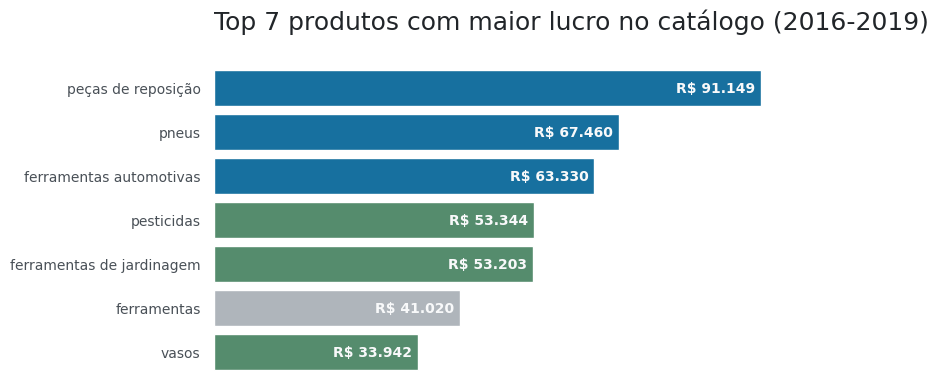

In [10]:
## Gerando a função para criar o gráfico de barras

def grafico_top_7():
  # Importando as bibliotecas
  import matplotlib.pyplot as plt
  import seaborn as sns

  # Área do gráfico e tema da visualização
  fig, ax = plt.subplots(figsize=(10,4))
  fig.subplots_adjust(right=0.7)
  sns.set_theme(style="white")

  # Definindo as cores do gráfico
  cores = [AZUL2, AZUL2, AZUL2, VERDE1, VERDE1, CINZA3, VERDE1]

  # Gerando o gráfico de barras
  ax = sns.barplot(data = top_7, x="lucro", y = top_7.index, palette = cores)
  # Personalizando o gráfico
  ax.set_title('Top 7 produtos com maior lucro no catálogo (2016-2019)\n', fontsize=18, color=CINZA1, loc='left')
  ax.set_xlabel('')
  ax.set_ylabel('')
  ax.set_xticklabels([])
  ax.yaxis.set_tick_params(labelsize=10, labelcolor = CINZA2)
  sns.despine(left = True, bottom = True)


  # Escrevendo os valores de cada barra no gráfico
  for i, valor in enumerate(top_7['lucro']):
      qtd = f'R$ {valor:,.0f}'.replace(',','.')
      offset = 1e3  # offset de 1.000
      ax.text(valor - offset, i, qtd, color= CINZA5, fontsize=10, fontweight='bold', ha='right', va='center')

  # retornando o eixo
  return ax

ax = grafico_top_7()



<ipython-input-10-e728970730d9>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data = top_7, x="lucro", y = top_7.index, palette = cores)


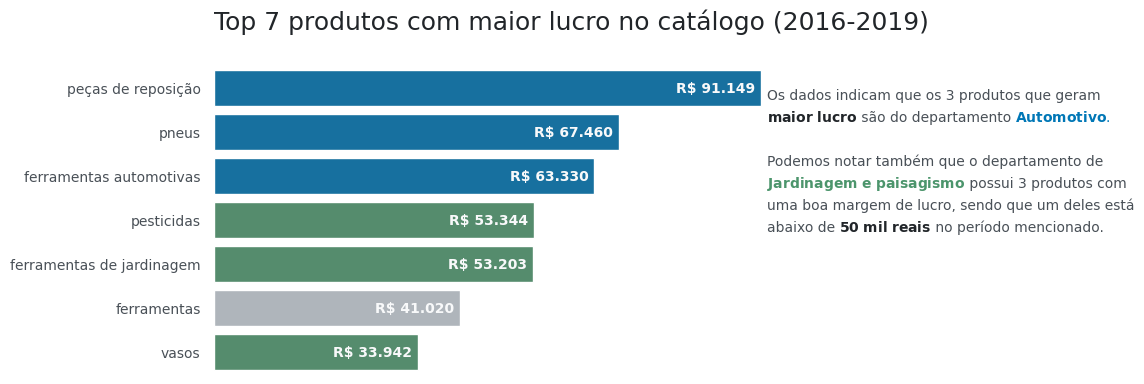

In [11]:
from matplotlib import transforms

def texto_colorido(x, y, texto, cores, esp=20, ax=None, **kw):
    cores = list(reversed(cores))
    t = ax.transData
    canvas = ax.figure.canvas

    for i, linha in enumerate(reversed(texto.split('\n'))):
        frases = linha.split('||')
        for s, cor in zip(frases, cores[i]):
            texto = ax.text(x, y, s, color=cor, transform=t, **kw)
            texto.draw(canvas.get_renderer())
            ex = texto.get_window_extent()
            t = transforms.offset_copy(texto._transform, x=ex.width,
                                       units='dots')

        t = transforms.offset_copy(ax.transData, x=0, y=(i + 1) * esp, units='dots')
## Configurando o gráfico com parâmetros que potencializam a visualização dos dados

# Chamando a função do gráfico de barras
ax = grafico_top_7()

# Anotando uma conclusão no gráfico
texto_colorido(
    9.2e4, 3.25,                                                       			 # coordenadas
    'Os dados indicam que os 3 produtos que geram\n'                    # texto
    '$\\bf{maior\ lucro}$|| são do departamento ||$\\bf{Automotivo}$.\n'
    '\n'
    'Podemos notar também que o departamento de\n'
    '$\\bf{Jardinagem\ e\ paisagismo}$|| possui 3 produtos com\n'
    'uma boa margem de lucro, sendo que um deles está\n'
    'abaixo de ||$\\bf{50\ mil\ reais}$|| no período mencionado.',
    [[CINZA2],                       	           # linha 1                         		 # cores
     [CINZA1, CINZA2, AZUL2],         # linha 2
     [CINZA2],                                     # linha 3
     [CINZA2],                       	          # linha 4
     [VERDE1, CINZA2],                   # linha 5
     [CINZA2],                                    # linha 6
     [CINZA2, CINZA1, CINZA2]        # linha 7
    ],
    esp=22,				 # espaçamento
    ax=ax,				 # figura onde desenhar o texto
    fontsize=10)

fig = ax.get_figure()

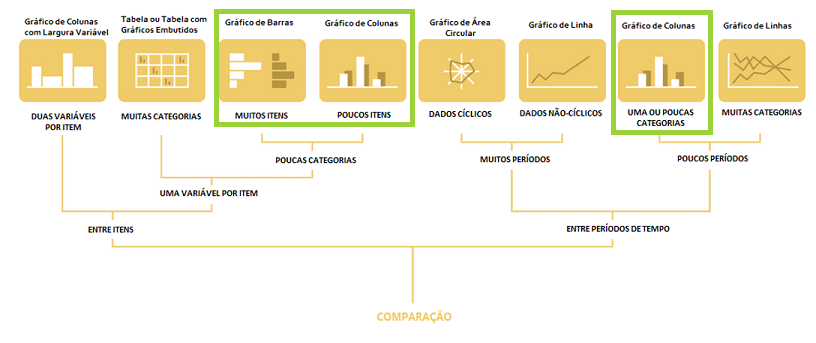

Se separarmos o Total de venda por ano por regiao? O que conseguimos observar em nossos dados?


In [12]:
#criando um novo DF com os dados desejados
df_vendas_reg = vendas.copy()
df_vendas_reg = df_vendas_reg[['data_pedido', 'regiao', 'vendas']]

#Gerando uma coluna que representa apenas os anos puxando da coluna data pedido
df_vendas_reg['ano'] = df_vendas_reg.data_pedido.dt.year
df_vendas_reg.drop(labels = 'data_pedido', axis = 1, inplace = True)

df_vendas_reg

,regiao,vendas,ano
0,Sudeste,890.66,2018
1,Sudeste,2488.59,2018
2,Sudeste,49.72,2018
3,Sul,3255.75,2017
4,Sul,76.04,2017
...,...,...,...
8935,Sudeste,123.22,2018
8936,Nordeste,271.97,2019
8937,Nordeste,700.75,2019
8938,Nordeste,85.83,2016


In [13]:
# Criando uma tabela cruzada (crosstab) com os valores de venda de cada ano por regiao
vendas_reg = pd.crosstab(index = df_vendas_reg.ano, columns = df_vendas_reg.regiao, values = df_vendas_reg.vendas, aggfunc = 'sum')

# Ajustando a tabela em ordem decrescente dos estados que mais executam vendas
vendas_reg = vendas_reg[['Sudeste', 'Nordeste','Centro-Oeste', 'Norte', 'Sul']]
vendas_reg

regiao,Sudeste,Nordeste,Centro-Oeste,Norte,Sul
ano,,,,,
2016,739602.18,378521.83,121653.63,101580.57,61294.12
2017,803005.61,320804.28,149215.00,124164.47,91990.16
2018,1033836.21,401365.77,208068.71,108710.09,132180.63
2019,1146764.08,600738.87,257781.18,170311.34,129410.82


# Gerando o GRÁFICO

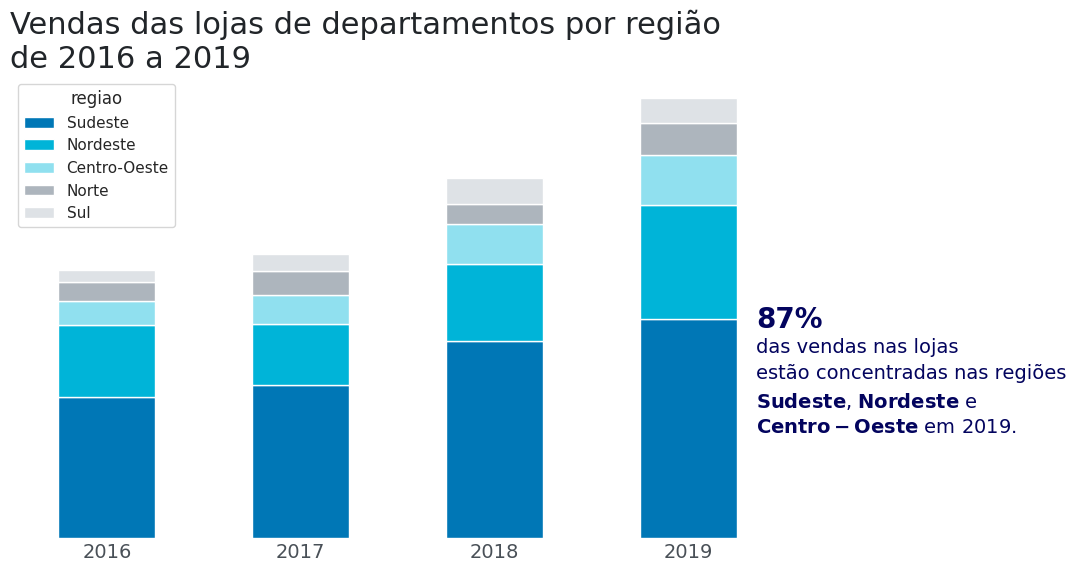

In [14]:
## Gerando a funcao para criar o grafico de barras

def grafico_vendas_regiao():
  # Definindo as cores que serao utilizadas
  cores = [AZUL2,AZUL3,AZUL4,CINZA3,CINZA4]

  # Gerando o grafico de colunas empilhadas
  ax = vendas_reg.plot(kind="bar", stacked=True, figsize=(10,6), color = cores)

  # Personalizando o gráfico
  ax.set_title('Vendas das lojas de departamentos por região\nde 2016 a 2019', loc='left', fontsize=22, color = CINZA1)
  ax.set_xlabel('')
  ax.set_ylabel('')
  ax.set_yticklabels([])
  ax.xaxis.set_tick_params(labelsize=14, labelcolor = CINZA2, rotation = 0)
  ax.set_frame_on(False)

  # Remover todos os ticks do eixo x e y (neste grafico em especifico como ja haviamos tratados os dados eles nao apareceram mas isso é importante para facilitar a visualizacao)
  ax.tick_params(axis="both", which="both", length=0)

  # Anotamos uma conclusao no grafico
  ax.text(3.35, 1.1e6, '87%', fontweight='bold', fontsize=20, color=AZUL1)
  ax.text(3.35, 5.5e5,
          'das vendas nas lojas\n'
          'estão concentradas nas regiões\n'
          '$\\bf{Sudeste}$, $\\bf{Nordeste}$ e\n'
          '$\\bf{Centro-Oeste}$ em 2019.',
          fontsize=14,
          linespacing=1.45,
          color=AZUL1)

  return ax

ax = grafico_vendas_regiao()




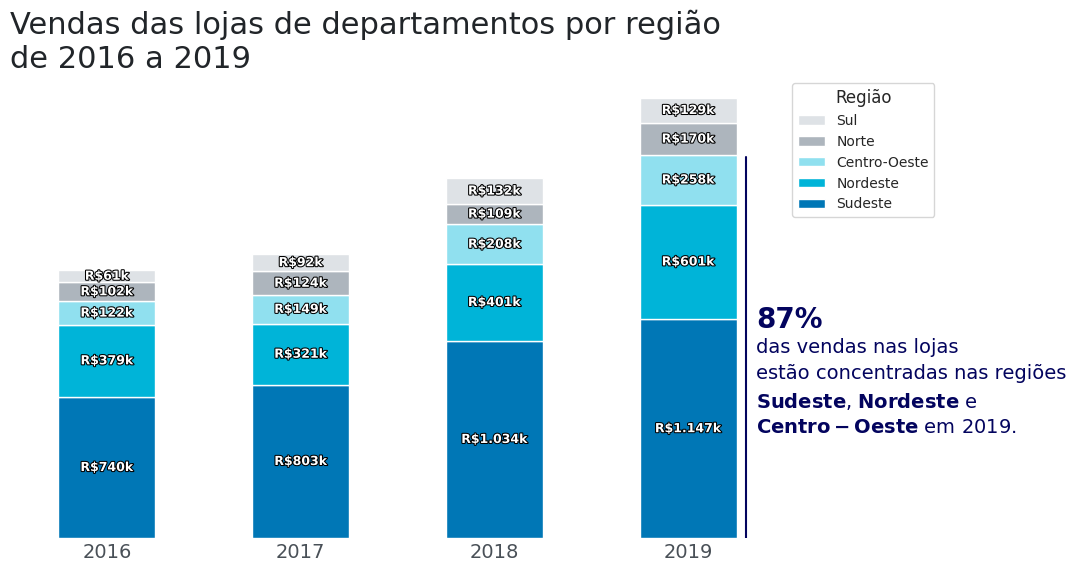

In [15]:
## Configurando o grafico com parametros que facilitam e direcionam a visualizacao dos dados

# Chamamos o grafico de barras

ax = grafico_vendas_regiao()

# Personalizando a legenda
ax.legend(bbox_to_anchor=(1,1), reverse = True, title = 'Região', title_fontsize = 12, fontsize = 10)

# Adicionando os valores nas barras para facilitar a visualizacao
for container in ax.containers:
    for bar in container:
        valor = bar.get_height()
        if valor == 0:
            continue
        label = f'R${valor/1000:,.0f}k'.replace(',', '.')
        text = ax.text(
            bar.get_x() + bar.get_width() / 2,
            bar.get_y() + bar.get_height() / 2,
            label,
            ha='center',
            va='center',
            fontsize=9,
            color='white',
            fontweight='bold'
        )
        text.set_path_effects([
            path_effects.Stroke(linewidth=1.5, foreground='black'),
            path_effects.Normal()
        ])
ax.axvline(x = 3.3,ymin = 0, ymax = 0.825, color= AZUL1, linewidth = 1.5)

fig = ax.get_figure()

In [16]:
# Criando um df com os dados desejados
df_envio = vendas.copy()
df_envio = df_envio[['modo_envio', 'segmento_cliente']]

# Criando uma tabela cruzada (crosstab) com os modos de envio divididos pelos clientes B2C e B2B
df_envio_seg = pd.crosstab(index = df_envio.modo_envio, columns = df_envio.segmento_cliente).sort_values("B2B")

df_envio_seg

segmento_cliente,B2B,B2C
modo_envio,,
24 horas,207,288
Envio rápido,676,673
Econômica,829,906
Entrega padrão,2552,2809


In [17]:
# Criando uma tabela cruzada (crosstab) com os modos de envio divididos pelos clientes B2C e B2B normalizado
df_envio_normalizado = pd.crosstab(index = df_envio.modo_envio, columns = df_envio.segmento_cliente, normalize = "index")

df_envio_normalizado

segmento_cliente,B2B,B2C
modo_envio,,
24 horas,0.418182,0.581818
Econômica,0.477810,0.522190
Entrega padrão,0.476031,0.523969
Envio rápido,0.501112,0.498888


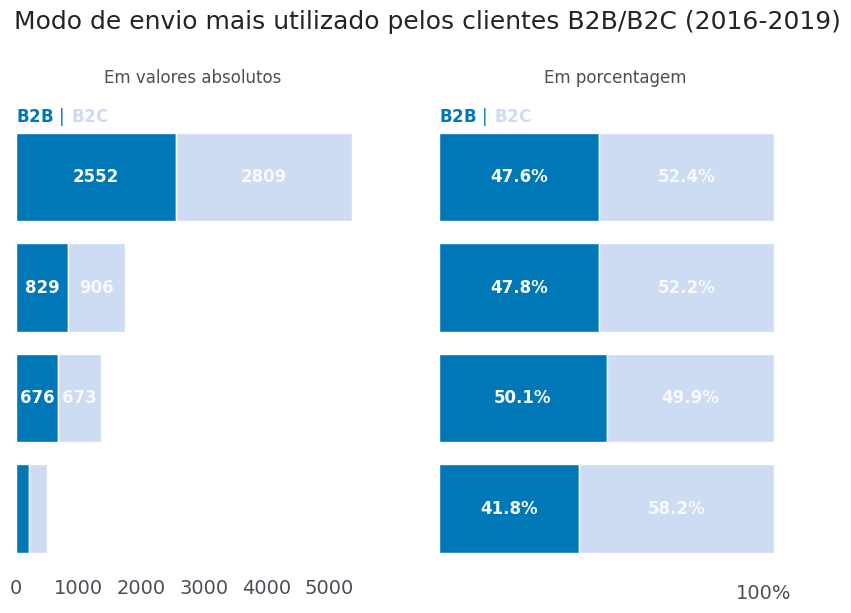

In [18]:
# Funcao para escrita de texto utilizando diferentes cores
from matplotlib import transforms

def texto_colorido(x, y, texto, cores, esp=20, ax=None, **kw):
    cores = list(reversed(cores))
    t = ax.transData
    canvas = ax.figure.canvas

    for i, linha in enumerate(reversed(texto.split('\n'))):
        frases = linha.split('||')
        for s, cor in zip(frases, cores[i]):
            texto = ax.text(x, y, s, color=cor, transform=t, **kw)
            texto.draw(canvas.get_renderer())
            ex = texto.get_window_extent()
            t = transforms.offset_copy(texto._transform, x=ex.width,
                                       units='dots')

        t = transforms.offset_copy(ax.transData, x=0, y=(i + 1) * esp, units='dots')

# Area Do Grafico e tema
fig, axs = plt.subplots(1, 2, figsize=(10,6), sharey = True)
cores = [AZUL2,AZUL5]

# Primeiro Grafico
axs[0].barh(df_envio_seg.index, df_envio_seg['B2B'], color = cores[0])
axs[0].barh(df_envio_seg.index, df_envio_seg['B2C'], left = df_envio_seg['B2B'], color = cores[1])
axs[0].set_title('Em valores absolutos\n', color = CINZA2)
axs[0].set_xlabel('')
axs[0].set_ylabel('')
axs[0].set_yticklabels([])
axs[0].xaxis.set_tick_params(labelsize=14, labelcolor = CINZA2, rotation = 0)
axs[0].set_frame_on(False)

# Remover Ticks dos eixo X e Y
axs[0].tick_params(axis= 'both', which = 'both', length =0)
texto_colorido(0, 3.5, '$\\bf{B2B}$ | || $\\bf{B2C}$', cores = [cores], ax=axs[0], fontsize=12)

# GRÁFICO 2 - Barras empilhadas 100 %
axs[1].barh(df_envio_normalizado.index, df_envio_normalizado["B2B"], color = cores[0])
axs[1].barh(df_envio_normalizado.index, df_envio_normalizado["B2C"], left = df_envio_normalizado["B2B"], color = cores[1])
axs[1].set_title('Em porcentagem\n', color = CINZA2)
axs[1].set_xlabel('100%', color = CINZA2, size = 14, loc='right')
axs[1].set_ylabel('')
axs[1].set_xticklabels([])
axs[1].set_frame_on(False)

# remover todos os ticks do eixo x e y
axs[1].tick_params(axis='both', which='both', length=0)

texto_colorido(0, 3.5, '$\\bf{B2B}$ | || $\\bf{B2C}$', cores = [cores], ax=axs[1], fontsize=12) # legenda

# Título dos gráficos
fig.suptitle("Modo de envio mais utilizado pelos clientes B2B/B2C (2016-2019)\n",
             fontsize=18, color=CINZA1, ha = 'right', x = 0.95, y = 1.05)

# Valores das barras
for container in axs[0].containers:
    labels = [str(valor.get_width()) if valor.get_width() > 300 else '' for valor in container]
    axs[0].bar_label(container, label_type='center', labels = labels, size = 12, color = CINZA5, fontweight='bold')

for container in axs[1].containers:
    labels = [f'{valor.get_width()*100:.1f}%' for valor in container]
    axs[1].bar_label(container, label_type='center', labels = labels, size = 12, color = CINZA5, fontweight='bold')

fig.show()


In [19]:
df_sp = vendas.copy()
df_sp = df_sp.query('estado == "São Paulo"')[["data_pedido", "vendas"]]

# Agrupando e arredondando as vendas por trimesmetre
df_sp.set_index("data_pedido", inplace = True)
df_sp = df_sp.resample("Q").agg("sum")
df_sp['vendas'] = round(df_sp['vendas']/1e3, 2)
df_sp = df_sp.reset_index()
df_sp

<ipython-input-19-a360727372a1>:6: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  df_sp = df_sp.resample("Q").agg("sum")


,data_pedido,vendas
0,2016-03-31,41.87
1,2016-06-30,43.79
2,2016-09-30,154.91
3,2016-12-31,144.82
4,2017-03-31,36.13
5,2017-06-30,76.86
6,2017-09-30,129.76
7,2017-12-31,197.94
8,2018-03-31,44.26
9,2018-06-30,109.64


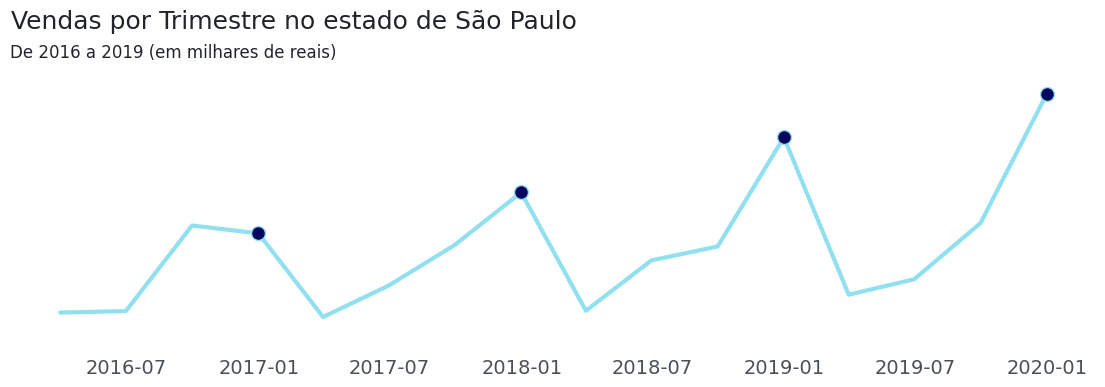

In [20]:
def grafico_vendas_sp_tri():
  fig,ax = plt.subplots(figsize=(14,4))

  #grafico
  pontos_a_marcar = [True if mes == 12 else False for mes in df_sp['data_pedido'].dt.month]

  ax.plot(df_sp['data_pedido'], df_sp['vendas'], lw = 3, color = AZUL4, marker = 'o',
          markersize = 10, markerfacecolor = AZUL1, markevery = pontos_a_marcar)
  # Personalizando
  ax.set_title('Vendas por Trimestre no estado de São Paulo', fontsize = 18, color=CINZA1, loc='left')
  ax.text(0.3,0.95,'De 2016 a 2019 (em milhares de reais)', transform=ax.transAxes, color = CINZA1, fontsize=12, ha='right', va='center')
  ax.set_xlabel('')
  ax.set_ylabel('')
  ax.set_yticklabels([])
  ax.xaxis.set_tick_params(labelsize=14, labelcolor = CINZA2, rotation = 0)
  ax.set_frame_on(False)
  plt.ylim(0,400)
  return ax



ax = grafico_vendas_sp_tri()

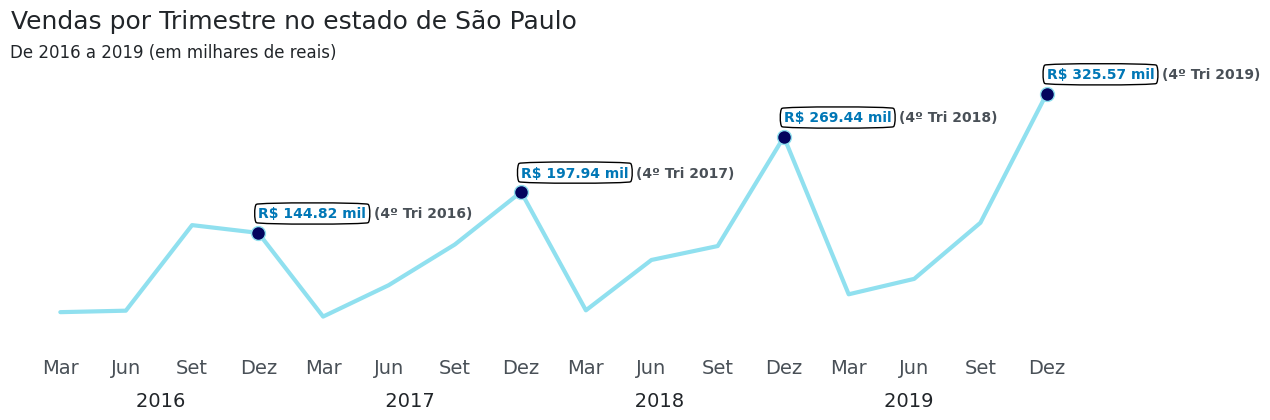

In [21]:
## Configurando o grafico com paramentros que melhoraram a visualizacao

import matplotlib.dates as mdates

ax = grafico_vendas_sp_tri()

# Ajuste no eixo x
ax.xaxis.set_major_locator(mdates.MonthLocator(interval = 3))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b'))
x_labels = ['Mar', 'Jun', 'Set', 'Dez' ]* 4
ax.set_xticks(df_sp.data_pedido)
ax.set_xticklabels(x_labels, ha = 'center')

#Organizando o eixo X
texto = [16*" " + str(i) + 16*" " for i in range(2016, 2020)]
ax.text(ax.get_xbound()[0] + 35, - 80, f'{texto[0]}{texto[1]}{texto[2]}{texto[3]}', fontsize=14, color=CINZA1)

#Destacando os valores do quarto Trimestre
ano = 0
for i in range(3, len(df_sp['vendas']),4):
  ax.text(
    x = ax.get_xticks()[i],
    y = df_sp['vendas'][i] + 20,
    s = f"R$ {df_sp['vendas'][i]} mil",
    color = AZUL2,
    weight = 'bold',
    fontsize = 10,
    bbox=dict(
        boxstyle="round4,pad=0.3",  # caixa arredondada com um pouco de preenchimento
        edgecolor="black",         # cor da borda
        facecolor="white",         # cor do fundo
        linewidth=1                # espessura da borda
    )
  )
  ax.text(x = ax.get_xticks()[i] + 160, y = df_sp["vendas"][i] + 20, s = f"(4º Tri {2016 + ano})", color = CINZA2, weight = "bold", fontsize = 10)
  ano +=1


#Sumir com os codigos
fig = ax.get_figure()

# Qual o faturamento por trimestre em cada região?

In [22]:
df_regiao = vendas.copy()
df_regiao = df_regiao[['regiao', 'data_pedido','vendas']]

#criando uma crosstab
df_regiao = pd.crosstab(index = df_regiao.data_pedido, columns = df_regiao.regiao, values = df_regiao.vendas, aggfunc = 'sum')

# ajustando a tabela em ordem decrescente dos estados
df_regiao = df_regiao[['Sudeste', 'Nordeste','Centro-Oeste', 'Norte', 'Sul']]
df_regiao


regiao,Sudeste,Nordeste,Centro-Oeste,Norte,Sul
data_pedido,,,,,
2016-01-04,55.92,NaN,NaN,NaN,NaN
2016-01-05,979.42,NaN,NaN,NaN,NaN
2016-01-06,NaN,NaN,66.42,NaN,NaN
2016-01-07,14940.66,43.44,NaN,NaN,NaN
2016-01-08,296.37,NaN,NaN,NaN,NaN
...,...,...,...,...,...
2019-12-27,NaN,2552.32,152.15,NaN,10.64
2019-12-28,603.96,NaN,NaN,NaN,NaN
2019-12-29,677.65,4079.73,NaN,456.94,NaN


In [23]:
df_regiao = df_regiao.resample('Q').agg('sum')
df_regiao = round(df_regiao/1e3, 2)
df_regiao

<ipython-input-23-d9d06e21b5cd>:1: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  df_regiao = df_regiao.resample('Q').agg('sum')


regiao,Sudeste,Nordeste,Centro-Oeste,Norte,Sul
data_pedido,,,,,
2016-03-31,70.18,41.73,16.80,9.31,1.51
2016-06-30,122.72,87.41,30.83,24.68,10.62
2016-09-30,226.43,158.12,39.61,21.94,11.97
2016-12-31,320.27,91.27,34.41,45.65,37.19
2017-03-31,127.89,61.58,5.90,35.25,4.75
2017-06-30,161.54,54.93,16.96,13.35,21.23
2017-09-30,206.29,91.60,48.82,48.71,21.68
2017-12-31,307.28,112.69,77.54,26.86,44.34
2018-03-31,120.56,92.40,29.30,39.03,6.95


In [24]:
import plotly.express as px

fig = px.line(df_regiao, x=df_regiao.index, y=df_regiao.columns, markers = True, labels={"regiao": "Região"},
              color_discrete_sequence=[AZUL2, VERMELHO1, AMARELO1 , VERDE1, CINZA3])
fig.update_layout(width=1300, height=600, font_family = 'DejaVu Sans', font_size=15,
                  font_color= CINZA2, title_font_color= CINZA3, title_font_size=24,
                   title_text='Faturamento da loja de departamentos por trimestre' +
                             '<br><sup size=1 style="color:#555655">De 2016 a 2019</sup>',
                  xaxis_title='', yaxis_title='', plot_bgcolor= CINZA5)
fig.update_yaxes(tickprefix="R$ ", ticksuffix=" mil")
labels = ['T1<br>2016', 'T2<br>2016', 'T3<br>2016', 'T4<br>2016',
          'T1<br>2017', 'T2<br>2017', 'T3<br>2017', 'T4<br>2017',
          'T1<br>2018', 'T2<br>2018', 'T3<br>2018', 'T4<br>2018',
          'T1<br>2019', 'T2<br>2019', 'T3<br>2019', 'T4<br>2019']
fig.update_xaxes(ticktext = labels, tickvals=df_regiao.index)

# Código omitido

fig.show()

In [30]:
# dados ao passar o mouse
fig.update_traces(mode="markers+lines", hovertemplate = "<b>Período:</b> %{x} <br> <b>Faturamento:</b> %{y}")
fig.update_layout(hovermode="closest")    # para exibir apenas do dado que passamos o mouse
# fig.update_layout(hovermode="x")          # para exibir todos os dados do período em cada linha
# fig.update_layout(hovermode="x unified")  # para exibir o resumo de todos os dados no período

fig.show()